# Image Preprocessing

Importing necessary libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import logging
import pathlib
import matplotlib.pyplot as plt
import os

Seperating the dataset into train and test dataset

In [3]:
#for logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#path of the training data sets
train_dir = "C:\\Users\\SANJEEV\\Documents\\IBM\\Classification of Arrhythmia by Using Deep Learning with 2-D ECG Spectral Image Representation\\data\\train"
train_dir = pathlib.Path(train_dir)
test_dir = "C:\\Users\\SANJEEV\\Documents\\IBM\\Classification of Arrhythmia by Using Deep Learning with 2-D ECG Spectral Image Representation\\data\\test"
test_dir = pathlib.Path(test_dir)


#defining parameters for the loaders
batch_size = 32
img_height = 180
img_width = 180

#validation split 80% for training and 20% for validation
x_train = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

x_test = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 15341 files belonging to 6 classes.
Using 12273 files for training.
Found 6825 files belonging to 6 classes.
Using 1365 files for validation.


Printing the collected Datasets

['Left Bundle Branch Block', 'Normal', 'Premature Atrial Contraction', 'Premature Ventricular Contractions', 'Right Bundle Branch Block', 'Ventricular Fibrillation']


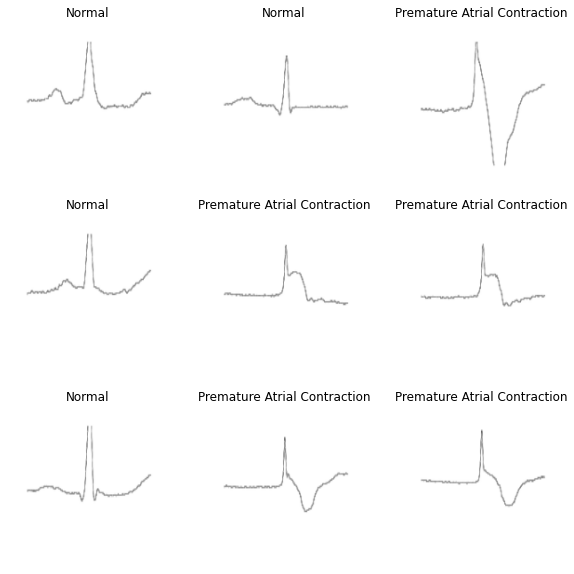

In [4]:
#for the classes present
class_names = x_train.class_names
print(class_names)

#Visualize the data
plt.figure(figsize=(10, 10))
for images, labels in x_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
for image_batch, labels_batch in x_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
for image_batch, labels_batch in x_test:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)


# Model Building

Create a model

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3,3),input_shape=(64,64,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(6, activation='softmax')
])

Compile the model 
and configuring the learning process

In [8]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Train the model

In [9]:
model.fit(
  x_train,
  validation_data=x_test,
  epochs=10
)

Epoch 1/10


c:\users\sanjeev\appdata\local\programs\python\python39\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


384/384 [==============================] - 234s 604ms/step - loss: 1.0759 - accuracy: 0.6923 - val_loss: 0.6241 - val_accuracy: 0.7780
Epoch 2/10
384/384 [==============================] - 220s 573ms/step - loss: 0.1869 - accuracy: 0.9481 - val_loss: 0.4917 - val_accuracy: 0.8212
Epoch 3/10
384/384 [==============================] - 218s 567ms/step - loss: 0.1234 - accuracy: 0.9643 - val_loss: 0.4976 - val_accuracy: 0.8432
Epoch 4/10
384/384 [==============================] - 218s 568ms/step - loss: 0.0932 - accuracy: 0.9730 - val_loss: 0.4793 - val_accuracy: 0.8527
Epoch 5/10
384/384 [==============================] - 226s 588ms/step - loss: 0.0787 - accuracy: 0.9789 - val_loss: 0.4496 - val_accuracy: 0.8447
Epoch 6/10
384/384 [==============================] - 244s 634ms/step - loss: 0.0587 - accuracy: 0.9827 - val_loss: 0.5319 - val_accuracy: 0.8615
Epoch 7/10
384/384 [==============================] - 238s 619ms/step - loss: 0.0473 - accuracy: 0.9861 - val_loss: 0.5458 - val_accura